In [1]:
import tensorflow as tf
import pandas as pd

tf.compat.v1.disable_v2_behavior()

import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras.preprocessing
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Add, Multiply
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, BatchNormalization
# regularizers
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
from scipy import signal
import openpyxl

data_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2011_smd_hourly.xls'
data_source_2011 = pd.read_excel(data_path_2011, sheet_name='ISONE CA')
data_source_2011 = pd.DataFrame(data_source_2011)
data_set_2011 = data_source_2011.iloc[:, -4:-1]
data_set_2011 = np.array(data_set_2011)

data_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2012_smd_hourly.xls'
data_source_2012 = pd.read_excel(data_path_2012, sheet_name='ISONE CA')
data_source_2012 = pd.DataFrame(data_source_2012)
data_set_2012a = np.array(data_source_2012.iloc[:1416, -4:-1])
data_set_2012b = np.array(data_source_2012.iloc[1440:, -4:-1])
data_set_2012 = np.vstack([data_set_2012a, data_set_2012b])
data_set_2012 = np.array(data_set_2012)

data_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2013_smd_hourly.xls'
data_source_2013 = pd.read_excel(data_path_2013, sheet_name='ISONE CA')
data_source_2013 = pd.DataFrame(data_source_2013)
data_set_2013 = data_source_2013.iloc[:, -4:-1]
data_set_2013 = np.array(data_set_2013)

data_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2014_smd_hourly.xls'
data_source_2014 = pd.read_excel(data_path_2014, sheet_name='ISONE CA')
data_source_2014 = pd.DataFrame(data_source_2014)
data_set_2014 = data_source_2014.iloc[:, -4:-1]
data_set_2014 = np.array(data_set_2014)

data_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2015_smd_hourly.xls'
data_source_2015 = pd.read_excel(data_path_2015, sheet_name='ISONE CA')
data_source_2015 = pd.DataFrame(data_source_2015)
data_set_2015 = data_source_2015.iloc[:, -4:-1]
data_set_2015 = np.array(data_set_2015)

data_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2016_smd_hourly.xls'
data_source_2016 = pd.read_excel(data_path_2016, sheet_name='ISO NE CA')
data_source_2016 = pd.DataFrame(data_source_2016)
data_set_2016a = np.array(data_source_2016.iloc[:1416, -5:-2])
data_set_2016b = np.array(data_source_2016.iloc[1440:, -5:-2])
data_set_2016 = np.vstack([data_set_2016a, data_set_2016b])
data_set_2016 = np.array(data_set_2016)

data_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2017_smd_hourly.xlsx'
data_source_2017 = pd.read_excel(data_path_2017, sheet_name='ISO NE CA')
data_source_2017 = pd.DataFrame(data_source_2017)
data_set_2017 = data_source_2017.iloc[:, -9:-6]
data_set_2017 = np.array(data_set_2017)

data_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2018_smd_hourly.xlsx'
data_source_2018 = pd.read_excel(data_path_2018, sheet_name='ISO NE CA')
data_source_2018 = pd.DataFrame(data_source_2018)
data_set_2018 = data_source_2018.iloc[:, -9:-6]
data_set_2018 = np.array(data_set_2018)

data_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2019_smd_hourly.xlsx'
data_source_2019 = pd.read_excel(data_path_2019, sheet_name='ISO NE CA')
data_source_2019 = pd.DataFrame(data_source_2019)
data_set_2019 = data_source_2019.iloc[:, -9:-6]
data_set_2019 = np.array(data_set_2019)

load = np.vstack([data_set_2011, data_set_2012, data_set_2013, data_set_2014, data_set_2015, data_set_2016, data_set_2017, data_set_2018, data_set_2019])
print(data_set_2011.shape)
print(data_set_2012.shape)
print(data_set_2013.shape)
print(data_set_2014.shape)
print(data_set_2015.shape)
print(data_set_2016.shape)
print(data_set_2017.shape)
print(data_set_2018.shape)
print(data_set_2019.shape)
print(load.shape)

pv_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2011.xlsx'
pv_source_2011 = pd.read_excel(pv_path_2011, sheet_name='HourlyData')
pv_source_2011 = pd.DataFrame(pv_source_2011)
pv_set_2011 = pv_source_2011.iloc[:, 3]
pv_set_2011 = pv_set_2011.fillna(0)
pv_set_2011 = np.array(pv_set_2011)
pv_set_2011 = pv_set_2011.reshape(-1,1)

pv_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2012.xlsx'
pv_source_2012 = pd.read_excel(pv_path_2012, sheet_name='HourlyData')
pv_source_2012 = pd.DataFrame(pv_source_2012)
pv_source_2012 = pv_source_2012.fillna(0)
pv_set_2012a = np.array(pv_source_2012.iloc[:1416, 3])
pv_set_2012b = np.array(pv_source_2012.iloc[1440:, 3])
pv_set_2012 = np.concatenate((pv_set_2012a, pv_set_2012b), axis=None)
pv_set_2012 = np.array(pv_set_2012)
pv_set_2012 = pv_set_2012.reshape(-1,1)

pv_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2013.xlsx'
pv_source_2013 = pd.read_excel(pv_path_2013, sheet_name='HourlyData')
pv_source_2013 = pd.DataFrame(pv_source_2013)
pv_set_2013 = pv_source_2013.iloc[:, 3]
pv_set_2013 = pv_set_2013.fillna(0)
pv_set_2013 = np.array(pv_set_2013)
pv_set_2013 = pv_set_2013.reshape(-1,1)

pv_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2014.xlsx'
pv_source_2014 = pd.read_excel(pv_path_2014, sheet_name='HourlyData')
pv_source_2014 = pd.DataFrame(pv_source_2014)
pv_set_2014 = pv_source_2014.iloc[:, 3]
pv_set_2014 = pv_set_2014.fillna(0)
pv_set_2014 = np.array(pv_set_2014)
pv_set_2014 = pv_set_2014.reshape(-1,1)

pv_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2015.xlsx'
pv_source_2015 = pd.read_excel(pv_path_2015, sheet_name='HourlyData')
pv_source_2015 = pd.DataFrame(pv_source_2015)
pv_set_2015 = pv_source_2015.iloc[:, 3]
pv_set_2015 = pv_set_2015.fillna(0)
pv_set_2015 = np.array(pv_set_2015)
pv_set_2015 = pv_set_2015.reshape(-1,1)

pv_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2016.xlsx'
pv_source_2016 = pd.read_excel(pv_path_2016, sheet_name='HourlyData')
pv_source_2016 = pd.DataFrame(pv_source_2016)
pv_source_2016 = pv_source_2016.fillna(0)
pv_set_2016a = np.array(pv_source_2016.iloc[:1416, 3])
pv_set_2016b = np.array(pv_source_2016.iloc[1440:, 3])
pv_set_2016 = np.concatenate((pv_set_2016a, pv_set_2016b), axis=None)
pv_set_2016 = np.array(pv_set_2016)
pv_set_2016 = pv_set_2016.reshape(-1,1)

pv_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2017.xlsx'
pv_source_2017 = pd.read_excel(pv_path_2017, sheet_name='HourlyData')
pv_source_2017 = pd.DataFrame(pv_source_2017)
pv_set_2017 = pv_source_2017.iloc[:, 3]
pv_set_2017 = pv_set_2017.fillna(0)
pv_set_2017 = np.array(pv_set_2017)
pv_set_2017 = pv_set_2017.reshape(-1,1)

pv_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2018.xlsx'
pv_source_2018 = pd.read_excel(pv_path_2018, sheet_name='HourlyData')
pv_source_2018 = pd.DataFrame(pv_source_2018)
pv_set_2018 = pv_source_2018.iloc[:, 3]
pv_set_2018 = pv_set_2018.fillna(0)
pv_set_2018 = np.array(pv_set_2018)
pv_set_2018 = pv_set_2018.reshape(-1,1)

pv_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2019.xlsx'
pv_source_2019 = pd.read_excel(pv_path_2019, sheet_name='HourlyData')
pv_source_2019 = pd.DataFrame(pv_source_2019)
pv_set_2019 = pv_source_2019.iloc[:, 3]
pv_set_2019 = pv_set_2019.fillna(0)
pv_set_2019 = np.array(pv_set_2019)
pv_set_2019 = pv_set_2019.reshape(-1,1)

pv = np.concatenate((pv_set_2011, pv_set_2012, pv_set_2013, pv_set_2014, pv_set_2015, pv_set_2016, pv_set_2017, pv_set_2018, pv_set_2019), axis=None)
pv = pv.reshape(-1,1)
print(pv.shape)

weather_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2011.csv'
weather_source_2011 = pd.read_csv(weather_path_2011)
weather_source_2011 = pd.DataFrame(weather_source_2011)
weather_set_2011 = weather_source_2011.iloc[2:, 5:16]
weather_set_2011 = np.array(weather_set_2011, dtype='float')

weather_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2012.csv'
weather_source_2012 = pd.read_csv(weather_path_2012)
weather_source_2012 = pd.DataFrame(weather_source_2012)
weather_set_2012 = weather_source_2012.iloc[2:, 5:16]
weather_set_2012 = np.array(weather_set_2012, dtype='float')

weather_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2013.csv'
weather_source_2013 = pd.read_csv(weather_path_2013)
weather_source_2013 = pd.DataFrame(weather_source_2013)
weather_set_2013 = weather_source_2013.iloc[2:, 5:16]
weather_set_2013 = np.array(weather_set_2013, dtype='float')

weather_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2014.csv'
weather_source_2014 = pd.read_csv(weather_path_2014)
weather_source_2014 = pd.DataFrame(weather_source_2014)
weather_set_2014 = weather_source_2014.iloc[2:, 5:16]
weather_set_2014 = np.array(weather_set_2014, dtype='float')

weather_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2015.csv'
weather_source_2015 = pd.read_csv(weather_path_2015)
weather_source_2015 = pd.DataFrame(weather_source_2015)
weather_set_2015 = weather_source_2015.iloc[2:, 5:16]
weather_set_2015 = np.array(weather_set_2015, dtype='float')

weather_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2016.csv'
weather_source_2016 = pd.read_csv(weather_path_2016)
weather_source_2016 = pd.DataFrame(weather_source_2016)
weather_set_2016 = weather_source_2016.iloc[2:, 5:16]
weather_set_2016 = np.array(weather_set_2016, dtype='float')

weather_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2017.csv'
weather_source_2017 = pd.read_csv(weather_path_2017)
weather_source_2017 = pd.DataFrame(weather_source_2017)
weather_set_2017 = weather_source_2017.iloc[2:, 5:16]
weather_set_2017 = np.array(weather_set_2017, dtype='float')

weather_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2018.csv'
weather_source_2018 = pd.read_csv(weather_path_2018)
weather_source_2018 = pd.DataFrame(weather_source_2018)
weather_set_2018 = weather_source_2018.iloc[2:, 5:16]
weather_set_2018 = np.array(weather_set_2018, dtype='float')

weather_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2019.csv'
weather_source_2019 = pd.read_csv(weather_path_2019)
weather_source_2019 = pd.DataFrame(weather_source_2019)
weather_set_2019 = weather_source_2019.iloc[2:, 5:16]
weather_set_2019 = np.array(weather_set_2019, dtype='float')

weather = np.vstack((weather_set_2011, weather_set_2012, weather_set_2013, weather_set_2014, weather_set_2015, weather_set_2016, weather_set_2017, weather_set_2018, weather_set_2019))
print(weather_set_2011.shape)
print(weather_set_2012.shape)
print(weather_set_2013.shape)
print(weather_set_2014.shape)
print(weather_set_2015.shape)
print(weather_set_2016.shape)
print(weather_set_2017.shape)
print(weather_set_2018.shape)
print(weather_set_2019.shape)
print(weather.shape)

weather_dat = np.zeros(shape=(78840,11))
print(weather[1,:])
print(weather[2,:])
print(weather[3,:])
for i in range(78840):
    weather_dat[i,:] = np.add(weather[2*i,:],weather[2*i+1,:])
weather_dat = np.true_divide(weather_dat,2)
print(weather_dat)
print(weather_dat.shape)

Instructions for updating:
non-resource variables are not supported in the long term
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(78840, 3)
(78840, 1)


C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(157680, 11)
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5896e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5579e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5161e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[[  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 ...
 [  0.      0.      0.    ...   0.11    0.4    97.18 ]
 [  0.      0.      0.    ...   0.11    0.4    96.97 ]
 [  0.      0.      0.    ...   0.11    0.4    97.225]]
(78840, 11)


In [2]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
print(max(dataall[1:,2]))

(78841, 15)
9999.0


In [3]:
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,36.0,29.0,12214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.77,0.866,0.1,100.0
1,36.0,29.0,11573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.7,0.866,0.1,100.0
2,35.0,29.0,11114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.23000000000002,0.866,0.1,100.0
3,35.0,30.0,10863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.525,0.866,0.1,100.0
4,36.0,31.0,10827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.47500000000001,0.866,0.1,100.0


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)

In [5]:
import seaborn as sns
from keijzer import *
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout, Activation, Multiply
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import activations
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import math

def get_flops(model):
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()

    # We use the Keras session graph in the call to the profiler.
    flops = tf.profiler.profile(graph=K.get_session().graph,
                                run_meta=run_meta, cmd='op', options=opts)

    return flops.total_float_ops  # Prints the "flops" of the model.

class LossHistory(tensorflow.keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.rmses = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_rmses = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.rmses.append(logs.get('root_mean_squared_error'))
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_rmses.append(logs.get('val_root_mean_squared_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [6]:
norm_df = np.array(norm_df)
norm_df2 = norm_df[:,(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14)]
def create_dataset(dataset, timesteps, output_timesteps):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps -output_timesteps - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[(i + timesteps):(i+timesteps+output_timesteps), :])
    return np.array(dataX), np.array(dataY)

timesteps = 24
output_timesteps = 12
X, Y = create_dataset(norm_df2, timesteps, output_timesteps)

print(X.shape)
print(Y.shape)

(78803, 24, 12)
(78803, 12, 12)


In [7]:
trX = X[:47286, :, :]
vaX = X[47286:55170, :, :]
teX = X[55170:, :, :]
trY = Y[:47286, :, 2]
vaY = Y[47286:55170,:, 2]
teY = Y[55170:, :,2]

print(trX.shape)
print(trY.shape)
print(teX.shape)
print(teY.shape)

(47286, 24, 12)
(47286, 12)
(23633, 24, 12)
(23633, 12)


In [8]:
with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1.2
    beta = 1.178511
    num_features = 12
    hfilters = 128
    hkernel_size1 = 2
    hkernel_size2 = 4
    visible1 = Input(shape=(timesteps, num_features))
    per1 = Permute((2,1))(visible1)
    den1a = Dense(timesteps, activation='tanh')(per1)
    den1b = Dense(timesteps, activation='sigmoid')(per1)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vec')(den1)
    mul1 = Multiply()([visible1, per2])
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res01 = Add()([d1, visible1])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res02 = Add()([d1, res01])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res03 = Add()([d1, res02])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res04 =Add()([d1, res03])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res04)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=32)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res05 = Add()([d1, res04])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=32)(res05) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res06 = Add()([d1, res05])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res06) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res07 = Add()([d1, res06])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res07)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res08 = Add()([d1, res07])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res08)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res09 = Add()([d1, res08])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res09) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res10 = Add()([d1, res09])   # 
    
    print('res10 :', res10.shape)  # (None, 24, 11) 
    
    out = Conv1D(512, 1, padding='same', activation='relu')(res10)   # 256, 11X10=110  
    out = Dropout(0.2)(out)   
    
    out = Conv1D(256, 1, padding='same', activation='relu')(out) # 512,  110X5=550
    out = Dropout(0.2)(out)  
    
    out = GlobalAveragePooling1D()(out) # pool_size=2, strides=1
    
    out = Dense(output_timesteps)(out) 
    model = Model(inputs=[visible1], outputs=[out])
    
    print(model.summary())
    
    model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[root_mean_squared_error, 'mse', 'mae', 'mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=100)
    batch_size = 100
    epochs = 1000

    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

res10 : (?, 24, 12)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 24, 12)]     0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 12, 24)       0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 12, 24)       600         permute[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 12, 24)       600         permute[0][0]                    
__________________________________________________________________________

In [9]:
    %%time
    hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

Train on 47286 samples, validate on 7884 samples
Epoch 1/1000
47286/47286 [==============================] - ETA: 0s - loss: 0.0777 - root_mean_squared_error: 0.0777 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 2365.7090

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


47286/47286 [==============================] - 17s 357us/sample - loss: 0.0777 - root_mean_squared_error: 0.0777 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 2365.7090 - val_loss: 0.1281 - val_root_mean_squared_error: 0.1281 - val_mean_squared_error: 0.0165 - val_mean_absolute_error: 0.0966 - val_mean_absolute_percentage_error: 27.8049
Epoch 2/1000
47286/47286 [==============================] - 13s 267us/sample - loss: 0.0637 - root_mean_squared_error: 0.0637 - mean_squared_error: 0.0049 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 2222.2461 - val_loss: 0.1127 - val_root_mean_squared_error: 0.1127 - val_mean_squared_error: 0.0128 - val_mean_absolute_error: 0.0830 - val_mean_absolute_percentage_error: 24.3309
Epoch 3/1000
47286/47286 [==============================] - 12s 263us/sample - loss: 0.0608 - root_mean_squared_error: 0.0608 - mean_squared_error: 0.0044 - mean_absolute_error: 0.0491 - mean_absolute_percentage_err

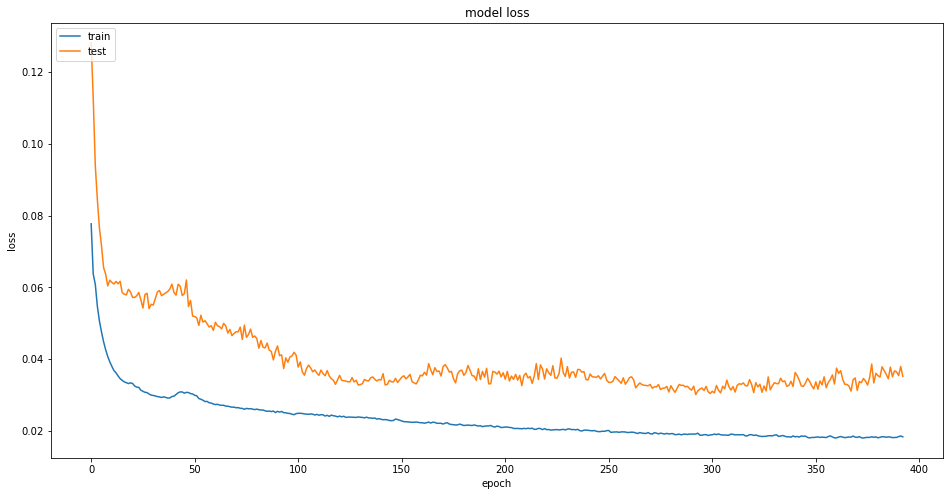

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8)) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('FSEFF2_TrainingandValidation Loss.png')
plt.show()

#print(get_flops(model))

In [11]:
trainPredict = model.predict(trX, batch_size=batch_size)
validPredict = model.predict(vaX, batch_size=batch_size)
testPredict = model.predict(teX, batch_size=batch_size)

In [12]:
tePredict = testPredict.reshape([-1])
testY = teY.reshape([-1])

np.savetxt('FSEFF2_testPredict.txt', tePredict)
 
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(testY-tePredict))), ' MAE == ', mean_absolute_error(testY, tePredict), 'MAPE == ', mean_absolute_percentage_error(testY, tePredict))

Error Test Score > RMSE ==  0.034881854131572756  MAE ==  0.02399234508572473 MAPE ==  8.529120696308926


In [13]:
e_tr = trainPredict - trY
e_va = validPredict - vaY
errors = np.vstack([e_tr,e_va])
prediction = np.vstack([trainPredict,validPredict])
print(errors.shape)
print(prediction.shape)

(55170, 12)
(55170, 12)


In [14]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
print(max(dataall[1:,2]))
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df2 = norm_df.iloc[:55170, :].copy()
norm_df2.head()

(78841, 15)
9999.0


,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0


In [15]:
norm_df2 = norm_df2.iloc[:,[0, 2, 6, 7, 8, 9, 11, 14]]
norm_df2.head()

,Dry bulb F,System Load,GHI,CS_DHI,CS_DNI,CS_GHI,SZ Angle,Rel. Humidity
0,0.423423,0.218118,0.0,0.0,0.0,0.0,0.998572,1.0
1,0.423423,0.185768,0.0,0.0,0.0,0.0,0.955240,1.0
2,0.414414,0.162604,0.0,0.0,0.0,0.0,0.887636,1.0
3,0.414414,0.149937,0.0,0.0,0.0,0.0,0.811215,1.0
4,0.423423,0.148120,0.0,0.0,0.0,0.0,0.732332,1.0


In [16]:
Prindex = ['Prediction1', 'Prediction2','Prediction3','Prediction4','Prediction5','Prediction6','Prediction7','Prediction8','Prediction9','Prediction10','Prediction11','Prediction12']
Erindex = ['Error1', 'Error2','Error3','Error4','Error5','Error6','Error7','Error8','Error9','Error10','Error11','Error12']

pr_df = pd.DataFrame(prediction, columns=Prindex)
pr_df.head()

,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,Prediction10,Prediction11,Prediction12
0,0.181993,0.159151,0.144968,0.138716,0.146281,0.173683,0.217044,0.263516,0.296032,0.313571,0.325173,0.326723
1,0.155563,0.144952,0.141464,0.147732,0.173116,0.220296,0.269693,0.304398,0.324440,0.336955,0.346309,0.344984
2,0.138813,0.133794,0.136538,0.157682,0.193477,0.230716,0.264317,0.288980,0.301944,0.307262,0.310157,0.306838
3,0.131089,0.135751,0.154072,0.189798,0.229496,0.264240,0.292301,0.307579,0.310761,0.309344,0.308497,0.307365
4,0.140086,0.159571,0.190426,0.228892,0.261237,0.286907,0.307478,0.315692,0.314835,0.312902,0.315586,0.324020


In [17]:
er_df = pd.DataFrame(errors, columns=Erindex)
er_df.head()

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,Error11,Error12
0,0.017622,0.024859,0.026725,0.025973,0.030864,0.044790,0.061455,0.075628,0.061513,0.031714,0.015256,0.002171
1,0.021271,0.026708,0.028721,0.032315,0.044224,0.064707,0.081805,0.069879,0.042583,0.027038,0.021756,0.014123
2,0.020569,0.021051,0.021120,0.028790,0.037887,0.042828,0.029797,0.007122,-0.007972,-0.017290,-0.020704,-0.020288
3,0.018346,0.020333,0.025180,0.034209,0.041608,0.029721,0.010443,-0.002338,-0.013791,-0.021516,-0.018629,-0.014311
4,0.024669,0.030679,0.034837,0.041005,0.026718,0.005049,-0.002439,-0.008860,-0.016025,-0.014224,-0.006089,-0.005478


In [18]:
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2.head()

,Dry bulb F,System Load,GHI,CS_DHI,CS_DNI,CS_GHI,SZ Angle,Rel. Humidity,Prediction1,Prediction2,...,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,Error11,Error12
0,0.423423,0.218118,0.0,0.0,0.0,0.0,0.998572,1.0,0.181993,0.159151,...,0.026725,0.025973,0.030864,0.044790,0.061455,0.075628,0.061513,0.031714,0.015256,0.002171
1,0.423423,0.185768,0.0,0.0,0.0,0.0,0.955240,1.0,0.155563,0.144952,...,0.028721,0.032315,0.044224,0.064707,0.081805,0.069879,0.042583,0.027038,0.021756,0.014123
2,0.414414,0.162604,0.0,0.0,0.0,0.0,0.887636,1.0,0.138813,0.133794,...,0.021120,0.028790,0.037887,0.042828,0.029797,0.007122,-0.007972,-0.017290,-0.020704,-0.020288
3,0.414414,0.149937,0.0,0.0,0.0,0.0,0.811215,1.0,0.131089,0.135751,...,0.025180,0.034209,0.041608,0.029721,0.010443,-0.002338,-0.013791,-0.021516,-0.018629,-0.014311
4,0.423423,0.148120,0.0,0.0,0.0,0.0,0.732332,1.0,0.140086,0.159571,...,0.034837,0.041005,0.026718,0.005049,-0.002439,-0.008860,-0.016025,-0.014224,-0.006089,-0.005478


In [19]:
norm_df2 = np.array(norm_df2)
print(norm_df2.shape)
timesteps = 24
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps)
print(Xe.shape)
print(Ye.shape)

(55170, 32)
(55144, 24, 32)
(55144, 1, 32)


In [20]:
trXe = Xe[:50000, :, :]
vaXe = Xe[50000:, :, :]
trYe = Ye[:50000, :, -12:]
vaYe = Ye[50000:, :, -12:]
trYe = trYe.reshape(-1,12)
vaYe = vaYe.reshape(-1,12)
print(trXe.shape)
print(trYe.shape)
print(vaXe.shape)

(50000, 24, 32)
(50000, 12)
(5144, 24, 32)


In [21]:
with tf.device('/gpu:0'):
    alpha=1.05
    gamma=1.2
    beta = 1.150109
    num_features = 32
    hfilters = 128
    hkernel_size1 = 2
    hkernel_size2 = 4
    visible1e = Input(shape=(timesteps, num_features))
    per1 = Permute((2,1))(visible1e)
    den1a = Dense(timesteps, activation='tanh')(per1)
    den1b = Dense(timesteps, activation='sigmoid')(per1)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vece')(den1)
    mul1 = Multiply()([visible1e, per2])
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res01 = Add()([d1, visible1e])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res02 = Add()([d1, res01])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res03 = Add()([d1, res02])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res04 =Add()([d1, res03])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res04)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=32)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res05 = Add()([d1, res04])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=32)(res05) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res06 = Add()([d1, res05])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res06) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res07 = Add()([d1, res06])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res07)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res08 = Add()([d1, res07])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res08)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res09 = Add()([d1, res08])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res09) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res10 = Add()([d1, res09])   # 
    
    print('res10 :', res10.shape)  # (None, 24, 11) 
    
    oute = Conv1D(512, 1, padding='same', activation='relu')(res10)   # 256, 11X10=110  
    oute = Dropout(0.2)(oute)   
    
    oute = Conv1D(256, 1, padding='same', activation='relu')(oute) # 512,  110X5=550
    oute = Dropout(0.2)(oute)  
    
    oute = GlobalAveragePooling1D()(oute) # pool_size=2, strides=1
    
    oute = Dense(12)(oute) 
    modele = Model(inputs=[visible1e], outputs=[oute])
    
    print(modele.summary())
    
    modele.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[root_mean_squared_error, 'mse', 'mae', 'mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=100)
    batch_size = 100
    epochs = 1000

    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

res10 : (?, 24, 32)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 24, 32)]     0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 32, 24)       0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 32, 24)       600         permute_1[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 32, 24)       600         permute_1[0][0]                  
________________________________________________________________________

In [22]:
    %%time
    histe = modele.fit(trXe, trYe, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaXe, vaYe), callbacks=[history, early_stopping])  # , checkpoint

Train on 50000 samples, validate on 5144 samples
Epoch 1/1000
49800/50000 [============================>.] - ETA: 0s - loss: 0.0216 - root_mean_squared_error: 0.0216 - mean_squared_error: 5.6357e-04 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 476.0396

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


50000/50000 [==============================] - 15s 297us/sample - loss: 0.0217 - root_mean_squared_error: 0.0217 - mean_squared_error: 5.6609e-04 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 475.3647 - val_loss: 0.0229 - val_root_mean_squared_error: 0.0228 - val_mean_squared_error: 5.2503e-04 - val_mean_absolute_error: 0.0169 - val_mean_absolute_percentage_error: 713.1513
Epoch 2/1000
50000/50000 [==============================] - 14s 274us/sample - loss: 0.0183 - root_mean_squared_error: 0.0183 - mean_squared_error: 3.9192e-04 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 476.3140 - val_loss: 0.0166 - val_root_mean_squared_error: 0.0166 - val_mean_squared_error: 2.7799e-04 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 585.7689
Epoch 3/1000
50000/50000 [==============================] - 14s 273us/sample - loss: 0.0150 - root_mean_squared_error: 0.0150 - mean_squared_error: 2.5219e-04 - mean_absolute_error: 0.0116 - mean_abs

In [30]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
print(max(dataall[1:,2]))
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df2 = norm_df.iloc[55170:, [0, 2, 6, 7, 8, 9, 11, 14]]

eteX, eteY = create_dataset(np.array(norm_df2), timesteps, output_timesteps)

print(eteX.shape)
print(eteY.shape)
print(tePredict.reshape(-1,12).shape)

npnorm2 =np.array(norm_df2)
npnorm2 = npnorm2[24:-13,:]
print(npnorm2.shape)

(78841, 15)
9999.0
(23644, 24, 8)
(23644, 1, 8)
(23633, 12)
(23633, 8)


In [31]:
pr_df = pd.DataFrame(tePredict.reshape(-1,12), columns=Prindex)
pr_df.head()

,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,Prediction10,Prediction11,Prediction12
0,0.267472,0.284241,0.282271,0.246015,0.188377,0.136988,0.101177,0.079712,0.069981,0.069372,0.079610,0.105060
1,0.283633,0.279363,0.243505,0.188339,0.136885,0.102162,0.082832,0.074806,0.074671,0.086876,0.119373,0.160721
2,0.283170,0.243492,0.188016,0.135737,0.098892,0.079791,0.071418,0.071467,0.084187,0.122093,0.174081,0.205431
3,0.245170,0.190862,0.138855,0.100930,0.079868,0.071927,0.072344,0.085410,0.122581,0.180982,0.227933,0.242358
4,0.180875,0.132740,0.097728,0.075948,0.069130,0.072542,0.087965,0.131780,0.190291,0.229632,0.248992,0.259881


In [32]:
teY = testY.reshape(-1,12)
e_te = testPredict-teY
er_df = pd.DataFrame(e_te, columns=Erindex)
er_df.head()

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,Error11,Error12
0,-0.011155,-0.015027,-0.017300,-0.011365,-0.010715,-0.006590,-0.006419,-0.007949,-0.008445,-0.008296,-0.012895,-0.030797
1,-0.015635,-0.020208,-0.013876,-0.010753,-0.006693,-0.005434,-0.004829,-0.003620,-0.002998,-0.005630,-0.016484,-0.048666
2,-0.016401,-0.013889,-0.011075,-0.007841,-0.008703,-0.007870,-0.007007,-0.006201,-0.008319,-0.013764,-0.035306,-0.064314
3,-0.012211,-0.008229,-0.004723,-0.006665,-0.007793,-0.006498,-0.005324,-0.007096,-0.013276,-0.028405,-0.041812,-0.059484
4,-0.018216,-0.010838,-0.009867,-0.011713,-0.009295,-0.005127,-0.004540,-0.004077,-0.019096,-0.040113,-0.052850,-0.060331


In [33]:
prnorm = np.array(pr_df)
ernorm =np.array(er_df)
print(ernorm.shape)

(23633, 12)


In [34]:
etedat = np.concatenate((npnorm2, prnorm, ernorm), axis=1)
print(etedat.shape)

(23633, 32)


In [37]:
eteX, eteY = create_dataset(etedat, timesteps, output_timesteps)
eteY = eteY[:,:,20:].reshape(-1,12)
print(eteX.shape)
print(eteY.shape)

(23607, 24, 32)
(23607, 12)


In [38]:
etePredict = modele.predict(eteX, batch_size=batch_size)
print(etePredict.shape)
print(etePredict)

(23607, 12)
[[-0.00802082 -0.00404843 -0.00233004 ...  0.00704487  0.01164766
   0.01657996]
 [-0.01081834 -0.01044183 -0.00884907 ...  0.00147144  0.00298079
   0.00617929]
 [-0.00387253 -0.00347994 -0.00371055 ...  0.00320287  0.00158621
  -0.00145791]
 ...
 [-0.00129097 -0.01145893 -0.01851356 ... -0.02023573 -0.02032834
  -0.02036527]
 [ 0.00026427 -0.00138927 -0.00180767 ...  0.01007211  0.015648
   0.02663175]
 [-0.00111819 -0.00210043 -0.00656127 ...  0.01178986  0.05066919
   0.07549567]]


In [39]:
testPredict = tePredict.reshape(-1,12)
addtestPredict = -etePredict + testPredict[24:-2,:]
print(addtestPredict.shape)

(23607, 12)


In [40]:
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(teY[24:-2,:]-testPredict[24:-2,:]))), ' MAE == ', mean_absolute_error(teY[24:-2,:], testPredict[24:-2,:]), 'MAPE == ', mean_absolute_percentage_error(teY[24:-2,:], testPredict[24:-2,:]))
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(teY[24:-2,:]-addtestPredict))), ' MAE == ', mean_absolute_error(teY[24:-2,:], addtestPredict), 'MAPE == ', mean_absolute_percentage_error(teY[24:-2,:], addtestPredict))

Error Test Score > RMSE ==  0.03488939437382436  MAE ==  0.023996728297083627 MAPE ==  8.530017868055081
Error Test Score > RMSE ==  0.01424846160106565  MAE ==  0.010456453821641879 MAPE ==  4.16174247815184


In [41]:
np.savetxt('FSEFF_FSEL_FinaltestPredict.txt', addtestPredict)

In [42]:
layer_outputs = [layer.output for layer in modele.layers if layer.name=='attention_vece']
activation_model = tf.keras.models.Model(inputs=modele.input, outputs=layer_outputs)
attention_vectors = []
output_data = activation_model.predict(eteX, batch_size=batch_size)
output_data = np.array(output_data)
print(output_data.shape)
at_vec = np.mean(output_data, axis=0)
print(at_vec, at_vec.shape)
np.savetxt('Attention_FSEFF_FSEL.txt', at_vec)
at_vec = abs(at_vec)

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(23607, 24, 32)
[[ 1.78129820e-03 -1.83404109e-03 -5.83681697e-03 -2.91288719e-02
   2.92840209e-02  1.42477723e-02  9.15752258e-03  3.59373214e-03
  -2.20425054e-03 -2.22416618e-03 -2.28723371e-03 -2.32857466e-03
  -2.33497657e-03 -2.22231401e-03 -2.08025589e-03 -1.95795670e-03
  -1.88003981e-03 -1.82081142e-03 -1.71299442e-03 -1.67289958e-03
  -6.85402676e-02 -6.89316243e-02 -6.96647465e-02 -6.98479190e-02
  -6.95396513e-02 -6.87471926e-02 -6.79695532e-02 -6.74307197e-02
  -6.71246871e-02 -6.68796524e-02 -6.65604398e-02 -6.66635931e-02]
 [ 2.83948102e-05 -5.55647828e-04 -7.40531925e-03 -1.28059443e-02
   4.07998014e-04 -2.40636128e-03  2.39684305e-04  5.11593789e-05
  -6.08659466e-04 -5.94021112e-04 -5.93113422e-04 -5.97998733e-04
  -5.99982450e-04 -5.83036570e-04 -5.62071451e-04 -5.47150732e-04
  -5.53433842e-04 -5.58542961e-04 -5.31856145e-04 -5.15888736e-04
  -3.93777229e-02 -3.98005359e-02 -4.05721478e-02 -4.08164822e-02
  -4.06096913e-02 -3.99564579e-02 -3.93367112e-02 -3.895703

In [43]:
import shap
shap.initjs()
background = trXe[np.random.choice(trXe.shape[0], 300, replace=False)]
print(background.shape)
explainer = shap.DeepExplainer(modele, background)
test_sample = trXe[-100:]
shap_values = explainer.shap_values(background)

(300, 24, 32)



In [44]:
index2 = np.concatenate([index, Prindex, Erindex])

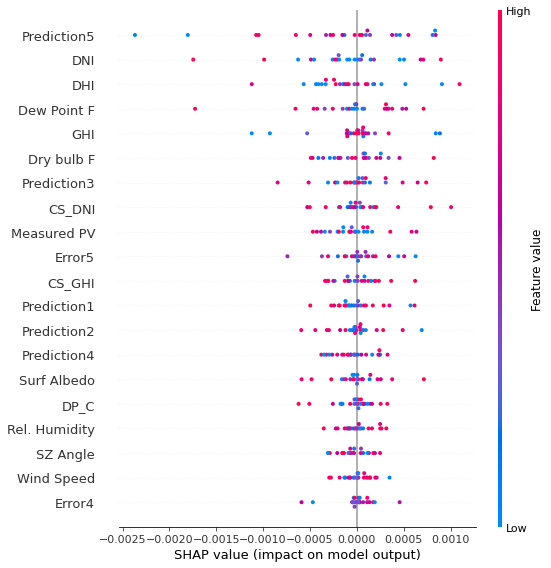

In [45]:
shap.summary_plot(shap_values[0][0], background[0], feature_names=index2)
#shap.force_plot(explainer.expected_value[0], shap_values[0], feature_names=index)

In [46]:
shap_np = np.array(shap_values[0])
shap_np = shap_np.reshape(-1,num_features)
print("=========================================================================")
print(shap_np)
np.savetxt('SHAP_VALUES_FSEFF_FSEL.txt', shap_np)

[[ 8.20184252e-04 -1.72654089e-03 -3.70159251e-05 ...  1.46707579e-05
  -2.34404059e-05 -5.28732604e-05]
 [-5.15960859e-05  7.11678550e-04  2.95731919e-05 ... -1.43855402e-06
   1.10101832e-04  4.80722426e-05]
 [-4.91476239e-04  3.10628080e-04  5.20531045e-05 ... -4.66860327e-05
  -3.97446621e-05 -8.67178323e-06]
 ...
 [-1.86835498e-04  1.67756313e-04  3.00454117e-04 ...  1.43770821e-04
   1.84053309e-04 -2.34756006e-04]
 [-3.45036658e-05  1.08882896e-05 -2.78892857e-04 ... -1.31130212e-04
  -3.29260684e-04  1.21853230e-04]
 [-2.01592754e-04 -3.01207767e-04  3.53024695e-04 ...  4.51886382e-04
   4.63909017e-04 -8.06716225e-04]]


In [47]:
np.savetxt('Final TestY.txt', teY[24:-2,:])